In [1]:
import numpy as np
from glob import glob
import pathlib
import os
import matplotlib.pyplot as plt
import re

In [2]:
datapath = os.path.abspath(os.path.join( "./../../", "data"))
os.listdir(datapath)

os.listdir(os.path.join(datapath , "F101994.v4"))

['F101994.v4b_web.avg_vis.tfw',
 'F101994.v4b_web.avg_vis.tif',
 'F101994.v4b_web.avg_vis.tif.gz',
 'F101994.v4b_web.cf_cvg.tfw',
 'F101994.v4b_web.cf_cvg.tif.gz',
 'F101994.v4b_web.stable_lights.avg_vis.tfw',
 'F101994.v4b_web.stable_lights.avg_vis.tif.gz',
 'README_V4.txt']

In [3]:
import rasterio
from rasterio.plot import show


def get_image(path):
    p = path #"data\F182013.v4\F182013.v4c_web.avg_vis.tif\F182013.v4c_web.avg_vis.tif"
    fp = os.path.abspath(os.path.join( "./../../", p))
    src = rasterio.open(fp)
    img = src.read(1)
    #fig, ax = plt.subplots(figsize=(18, 10))
    #ax.imshow(img[4000:9000 , 28000:35000 ], cmap='pink')
    return img
    #show(img)

In [4]:
im2013 = get_image("data\F182013.v4\F182013.v4c_web.avg_vis.tif\F182013.v4c_web.avg_vis.tif")

In [5]:
im1994 = get_image("data\F101994.v4\F101994.v4b_web.avg_vis.tif\F101994.v4b_web.avg_vis.tif")

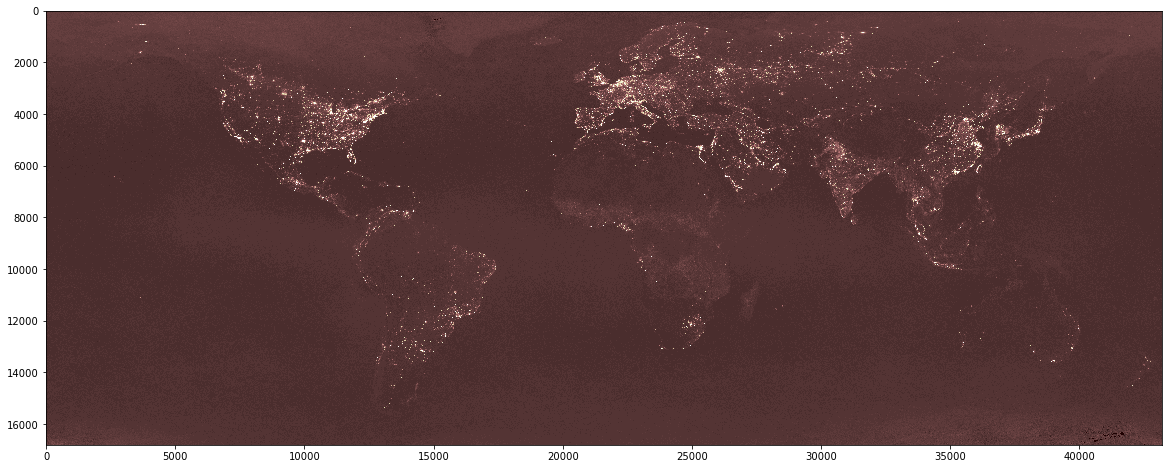

In [7]:
f,ax = plt.subplots(1,1 ,figsize=(20,8))
ax.imshow(im2013.astype(np.byte) , cmap='pink' )

In [8]:
np.quantile(im2013 , np.arange(0,1,0.1))

array([0., 3., 3., 3., 3., 4., 4., 4., 4., 5.])

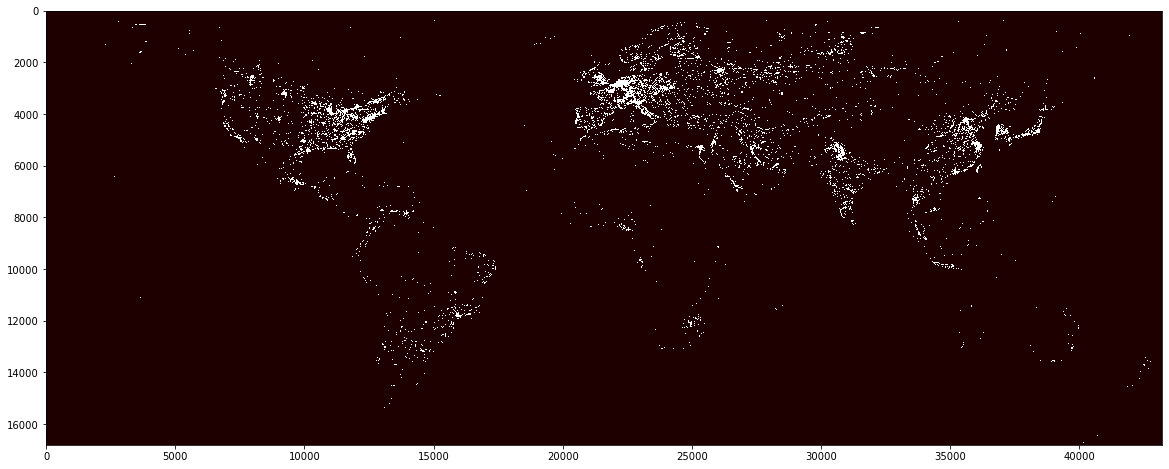

In [12]:
f,ax = plt.subplots(1,1 ,figsize=(20,8))
ax.imshow(im2013 > 10 , cmap='pink')

In [16]:
im2013.shape

(16801, 43201)

c:\users\abhijeet\documents\github\datathon\dt\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


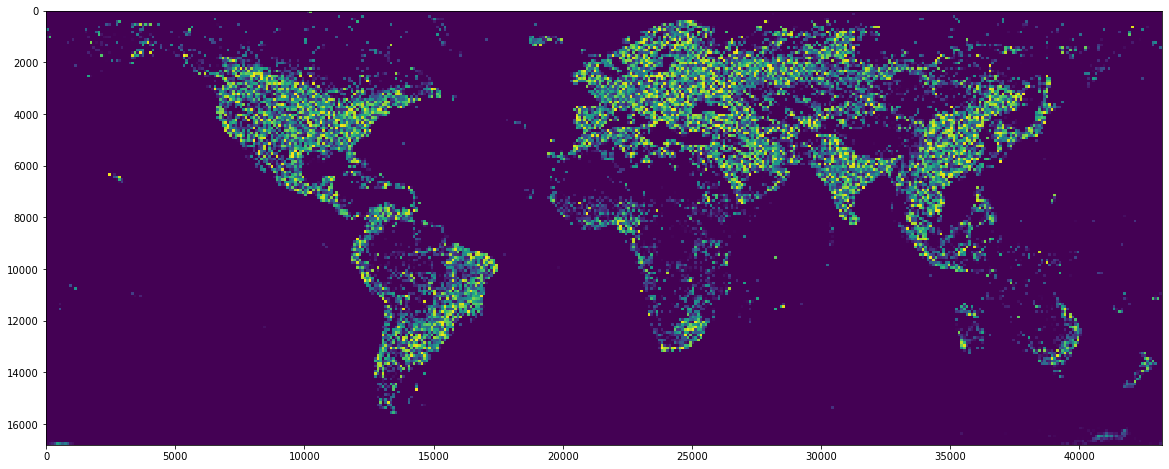

In [22]:
pim2013 = np.copy(im2013)
ist = 100
jst = 100
for i in np.arange(0,pim2013.shape[0],ist):
    for j in np.arange(0,pim2013.shape[1], jst):
        patch = pim2013[i:i+ist , j:j+jst]
        val = (patch > 10).sum() #/ (ist * jst)
        #print(val)
        pim2013[i:i+ist , j:j+jst] = val

patch = patch/ patch.max()
f,ax = plt.subplots(1,1 ,figsize=(20,8))
ax.imshow(pim2013)

In [200]:
def india_selector(img):
    return img[4000:9000 , 28000:35000]

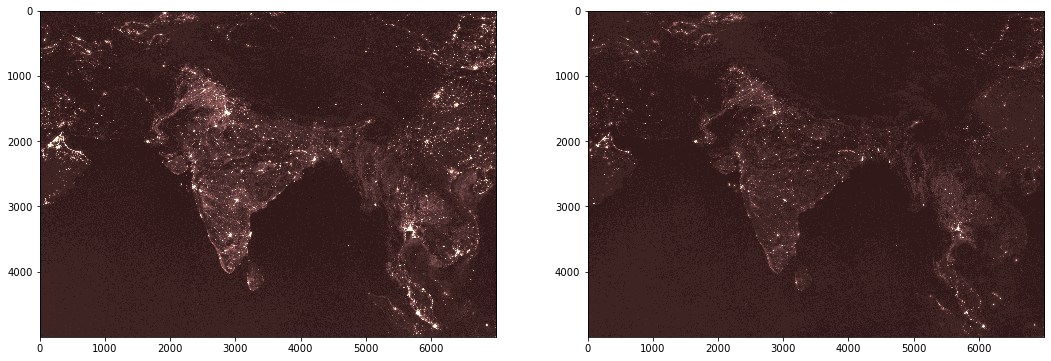

In [201]:
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(18, 10))
ax1.imshow(india_selector(im2013) , cmap='pink')
ax2.imshow(india_selector(im1994), cmap='pink')

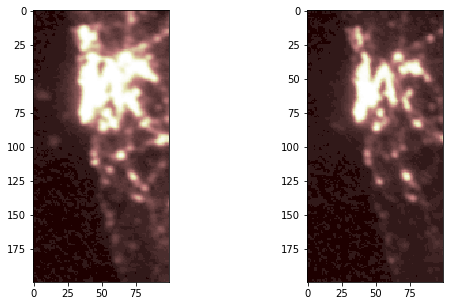

In [202]:
mumbai2013 = india_selector(im2013)[2650:2850 , 2300:2400]
mumbai1994 = india_selector(im1994)[2650:2850 , 2300:2400]
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(9, 5))
ax1.imshow(mumbai2013 , cmap='pink')
ax2.imshow(mumbai1994, cmap='pink')

In [203]:
np.quantile(mumbai2013.flatten() , np.arange(0,1,0.25))

array([ 3.,  4.,  6., 13.])

In [204]:
np.quantile(mumbai1994.flatten() , np.arange(0,1,0.25))

array([2., 3., 4., 7.])

In [205]:
from PIL import ImageFilter, Image

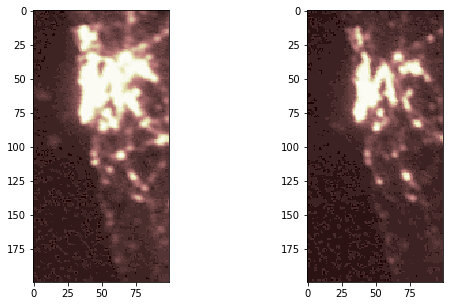

In [206]:
mumbai2013 = Image.fromarray(india_selector(im2013)[2650:2850 , 2300:2400]).filter(ImageFilter.SHARPEN)
mumbai1994 = Image.fromarray(india_selector(im1994)[2650:2850 , 2300:2400]).filter(ImageFilter.SHARPEN)
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(9, 5))
ax1.imshow(mumbai2013 , cmap='pink')
ax2.imshow(mumbai1994, cmap='pink')

In [207]:
np.quantile(np.array(mumbai2013).flatten() , np.arange(0,1,0.25))

array([ 2.,  4.,  6., 13.])

In [208]:
np.quantile(np.array(mumbai1994).flatten() , np.arange(0,1,0.25))

array([1., 3., 4., 7.])

### Thresholding

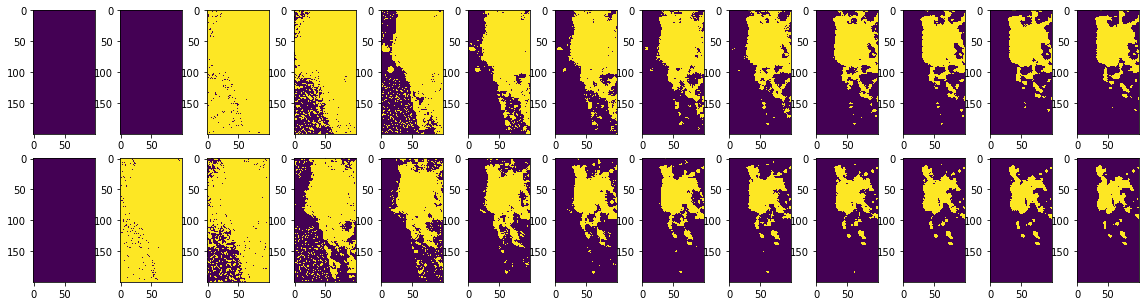

In [209]:
fig,ax = plt.subplots(2,13 , figsize=(20,5))
for i in range(0,13):
    ax[0][i].imshow(np.array(mumbai2013) > i)
    ax[1][i].imshow(np.array(mumbai1994) > i)